In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [3]:
data=pd.read_csv('C:/Users/imadi/Downloads/Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# number of duplicate rows/entries
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# Removing irrelevant columns such as name and customerid
data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


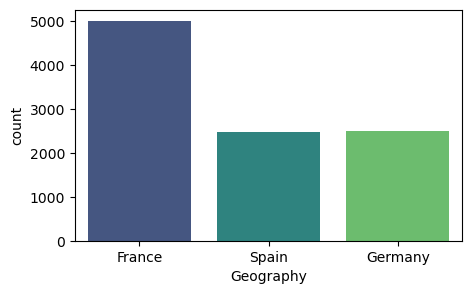

In [26]:

plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Geography', data=data, palette='viridis')

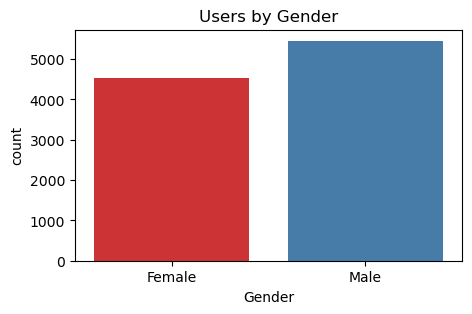

In [27]:
# Customer distribution by gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=data, palette='Set1')
plt.title('Users by Gender')
plt.xlabel('Gender')
plt.show()

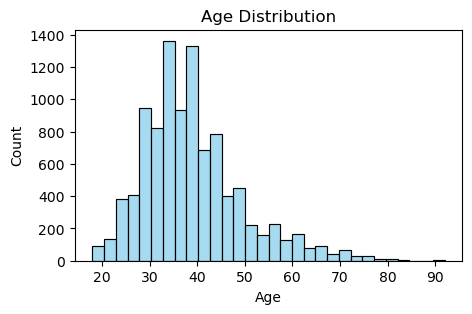

In [28]:
# Customer distribution by age
plt.figure(figsize=(5, 3))
sns.histplot(data['Age'], bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

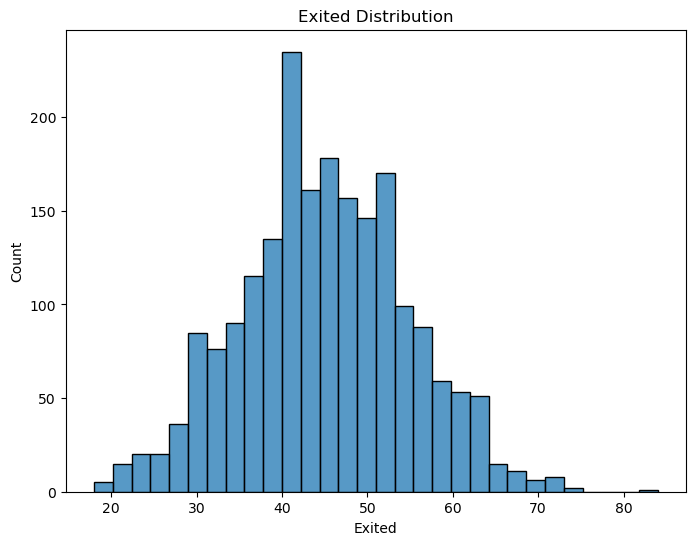

In [29]:
# Distribution of churn by age
exited = data.loc[data['Exited']==1,:]

plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=exited, bins=30)
plt.title('Exited Distribution')
plt.xlabel('Exited')
plt.show()

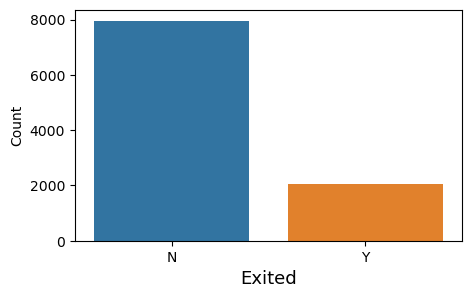

In [30]:
# Number of churned members 
plt.figure(figsize=(5, 3))
sns.countplot(x='Exited', data=data)
plt.xlabel('Exited', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.ylabel('Count')
plt.show()

<Axes: >

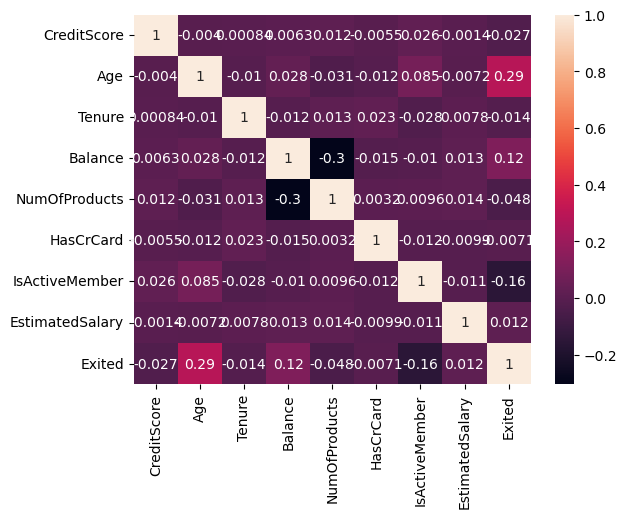

In [15]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

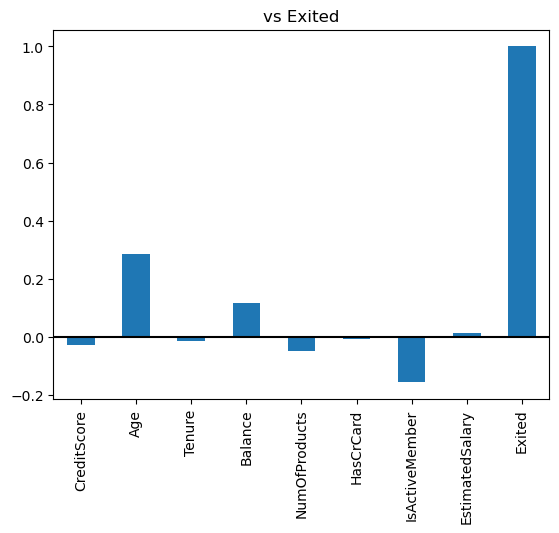

In [16]:
data.corr(numeric_only=True)['Exited'].plot(kind='bar',title='vs Exited')
plt.axhline(y = 0,color='black', linestyle = '-')

In [ ]:
#Insights
#Males are more likely to exit than females
#People having credit card are more likely to churn

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
X=data.drop('Exited', axis=1)
y=data['Exited']

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
ct=ColumnTransformer(
    [
        ('ohe',OneHotEncoder(drop='first'),['Geography','Gender']),
        ('sc',StandardScaler(),['CreditScore','Age','Balance','EstimatedSalary']),
    ]
)
X_new = ct.fit_transform(X)
X_new

array([[ 0.        ,  0.        ,  0.        , ...,  0.29351742,
        -1.22584767,  0.02188649],
       [ 0.        ,  1.        ,  0.        , ...,  0.19816383,
         0.11735002,  0.21653375],
       [ 0.        ,  0.        ,  0.        , ...,  0.29351742,
         1.33305335,  0.2406869 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.27860412,
        -1.22584767, -1.00864308],
       [ 1.        ,  0.        ,  1.        , ...,  0.29351742,
        -0.02260751, -0.12523071],
       [ 0.        ,  0.        ,  0.        , ..., -1.04143285,
         0.85996499, -1.07636976]])

In [21]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [22]:
# testing out different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [23]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7965

In [24]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8175

In [25]:
# Gradient Classifier
model_gc = GradientBoostingClassifier()
model_gc.fit(X_train, y_train)
y_pred = model_gc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8235

In [ ]:
#Observation: Gradient Boosting Clasifier gives the highest accuracy among these algorithms